<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir/Netoptic_vgg16_bot_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Бот

In [ ]:
!pip install python-telegram-bot==20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.4/545.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
# Монтирование GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from telegram.ext import Application, CommandHandler, MessageHandler, filters
# from dotenv import load_dotenv
from io import BytesIO
from PIL import Image
import numpy as np
import os
import numpy as np
from PIL import Image

IMG_WIDTH = 256                   # Ширина изображения для нейросети
IMG_HEIGHT = 512                  # Высота изображения для нейросети
CLASS_COUNT = 2
FILE_BEST_WEIGHTS = '/content/drive/MyDrive/data_stazhirovka1/material_best_model_w.h5'    # веса модели с лучщим val_accuracy

# ====== Модель и загрузка весов (были только веса и не было сохраненной модели)=====================================
def load_model(IMG_WIDTH = 256, IMG_HEIGHT = 512):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
    from keras.applications import VGG16

    model_vgg16_trained = VGG16(weights='imagenet',
                            include_top=False,
                            input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

    model_vgg16_trained.trainable = False
    model = Sequential()
    model.add(model_vgg16_trained)
    model.add(Flatten(name='Class_1'))
    model.add(Dense(256, activation='relu', name='Class_2'))
    model.add(Dropout(0.3))
    model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_3'))

#    FILE_BEST_WEIGHTS = 'material_best_model_w.h5'  # Загрузка сохраненных лучших весов
    model.load_weights(FILE_BEST_WEIGHTS)
    return model

model = load_model()

#====== Запуск бота =======================================================================================

# возьмем переменные окружения из .env
load_dotenv()

# загружаем токен бота
TOKEN = os.environ.get("TOKEN")

# функция команды /start
async def start(update, context):
    await update.message.reply_text('Привет! Отправь этому боту фотографию оправы для распознавания материала.')


# функция обработки изображений
async def material(update, context):
    await update.message.reply_text('Мы получили от тебя фотографию. Идет распознавание материала...')

    file = await update.message.document.get_file()
    # извлекаем изображение в формате bytearray
    file = await update.message.document.get_file()
    image = await file.download_as_bytearray()
    img = Image.open(BytesIO(image)).resize((IMG_HEIGHT, IMG_WIDTH))

    img_np = np.array(img)
    data_images = []
    data_images.append(img_np)
    x_data = np.array(data_images)

    result = model.predict(x_data)  # предсказание модели
    if np.argmax(result) == 0:
        frame_material = "Оправа металлическая"
    else:
        frame_material = "Оправа пластиковая"

    # возвращаем результат обратно пользователю
    await update.message.reply_text(frame_material)


def main():
    # точка входа в приложение
    application = Application.builder().token(TOKEN).build()
    print('Бот запущен...')

    # добавляем обработчик команды /start
    application.add_handler(CommandHandler("start", start))

    # добавляем обработчик фото
    application.add_handler(MessageHandler(filters.Document.IMAGE, material))

    # запуск приложения (для остановки нужно нажать Ctrl-C)
    application.run_polling()


if __name__ == "__main__":
    main()

58889256/58889256 [==============================] - 0s 0us/step
Бот запущен...


RuntimeError: ignored

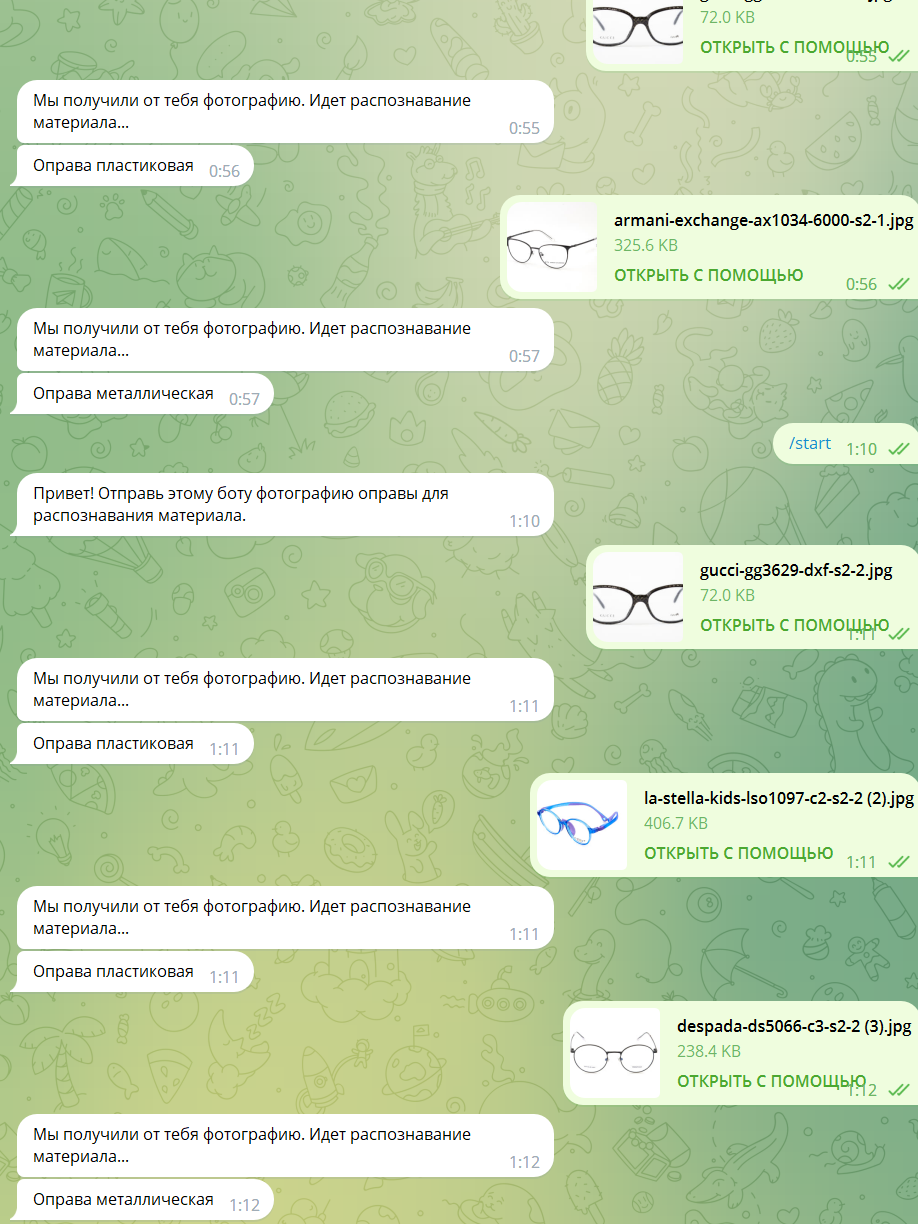